In [1]:
import numpy as np 
import pandas as pd 
from sklearn import tree

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("crop_production.csv",encoding = "ISO-8859-1")
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [3]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
df['Production']=pd.to_numeric(df['Production'],errors='coerce')
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [5]:
data = df.groupby('Crop_Year')[['Area', 'Production']].mean()
data = data.reset_index()
data


,Crop_Year,Area,Production
0,1997,26038.324081,9.565489e+04
1,1998,14479.153906,5.172545e+05
2,1999,12678.074790,5.172145e+05
3,2000,12102.612169,5.496723e+05
4,2001,12371.499489,5.616144e+05
5,2002,9463.680476,4.654666e+05
6,2003,9954.769395,4.619857e+05
7,2004,11891.933465,5.909555e+05
8,2005,11822.333236,5.949965e+05
9,2006,11913.672644,6.212016e+05


In [6]:
data['CPI']=data['Production']/data['Area']
data

,Crop_Year,Area,Production,CPI
0,1997,26038.324081,9.565489e+04,3.673619
1,1998,14479.153906,5.172545e+05,35.724086
2,1999,12678.074790,5.172145e+05,40.795984
3,2000,12102.612169,5.496723e+05,45.417661
4,2001,12371.499489,5.616144e+05,45.395827
5,2002,9463.680476,4.654666e+05,49.184519
6,2003,9954.769395,4.619857e+05,46.408482
7,2004,11891.933465,5.909555e+05,49.693814
8,2005,11822.333236,5.949965e+05,50.328177
9,2006,11913.672644,6.212016e+05,52.141903


In [7]:
data.describe()

,Crop_Year,Area,Production,CPI
count,19.000000,19.000000,1.900000e+01,19.000000
mean,2006.000000,12141.402985,5.496122e+05,48.098795
std,5.627314,3633.397954,2.364693e+05,22.994038
min,1997.000000,8187.362989,1.236197e+04,1.509884
25%,2001.500000,10531.577629,4.737958e+05,43.095905
50%,2006.000000,11768.527148,5.496723e+05,46.408482
75%,2010.500000,12237.055829,6.073835e+05,51.235040
max,2015.000000,26038.324081,1.037554e+06,95.030260


In [8]:
print(data)

    Crop_Year          Area    Production        CPI
0        1997  26038.324081  9.565489e+04   3.673619
1        1998  14479.153906  5.172545e+05  35.724086
2        1999  12678.074790  5.172145e+05  40.795984
3        2000  12102.612169  5.496723e+05  45.417661
4        2001  12371.499489  5.616144e+05  45.395827
5        2002   9463.680476  4.654666e+05  49.184519
6        2003   9954.769395  4.619857e+05  46.408482
7        2004  11891.933465  5.909555e+05  49.693814
8        2005  11822.333236  5.949965e+05  50.328177
9        2006  11913.672644  6.212016e+05  52.141903
10       2007  10513.848637  4.821251e+05  45.856191
11       2008  11768.527148  5.423063e+05  46.081067
12       2009  11738.077997  5.564389e+05  47.404599
13       2010  12557.355280  4.573050e+05  36.417306
14       2011  10918.140920  1.037554e+06  95.030260
15       2012  11369.858240  6.197705e+05  54.509962
16       2013  10368.125223  9.575947e+05  92.359485
17       2014  10549.306622  8.011596e+05  75.

<Axes: xlabel='CPI'>

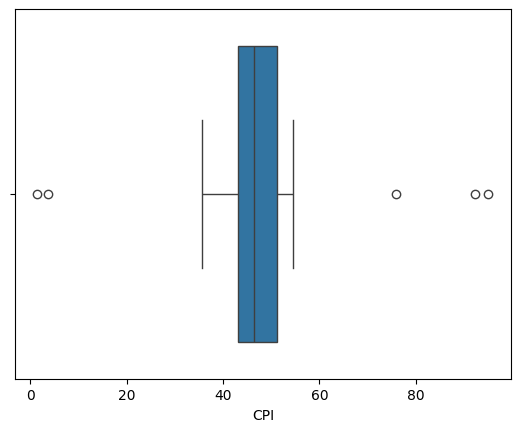

In [9]:
import seaborn as sns
sns.boxplot(x=data['CPI'])

In [10]:
data = data[np.isfinite(data['CPI'])]
data=data[data.CPI >43]
data=data[data.CPI <51]
data.set_index('Crop_Year')
data

,Crop_Year,Area,Production,CPI
3,2000,12102.612169,549672.332849,45.417661
4,2001,12371.499489,561614.446722,45.395827
5,2002,9463.680476,465466.567649,49.184519
6,2003,9954.769395,461985.734566,46.408482
7,2004,11891.933465,590955.527122,49.693814
8,2005,11822.333236,594996.473832,50.328177
10,2007,10513.848637,482125.050009,45.856191
11,2008,11768.527148,542306.282654,46.081067
12,2009,11738.077997,556438.877374,47.404599


array([[<Axes: title={'center': 'Crop_Year'}>,
        <Axes: title={'center': 'Area'}>],
       [<Axes: title={'center': 'Production'}>,
        <Axes: title={'center': 'CPI'}>]], dtype=object)

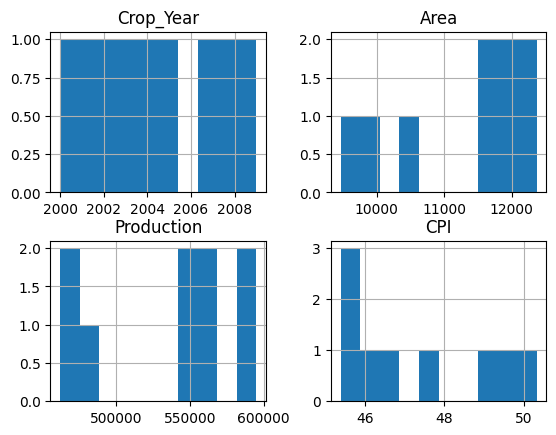

In [11]:
data.hist()

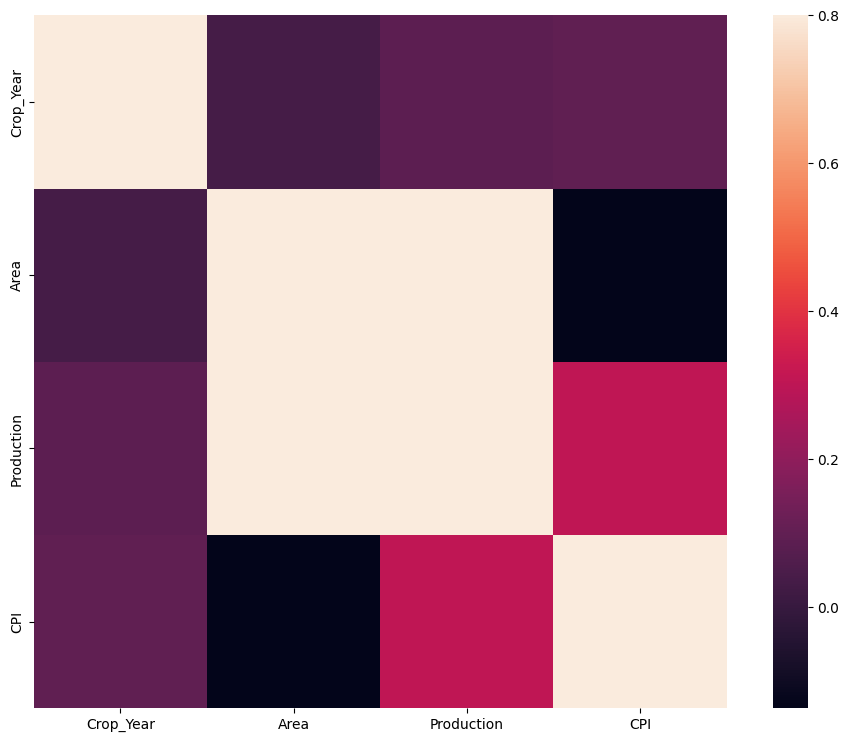

In [12]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8,square=True);

c:\Users\pavithrm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


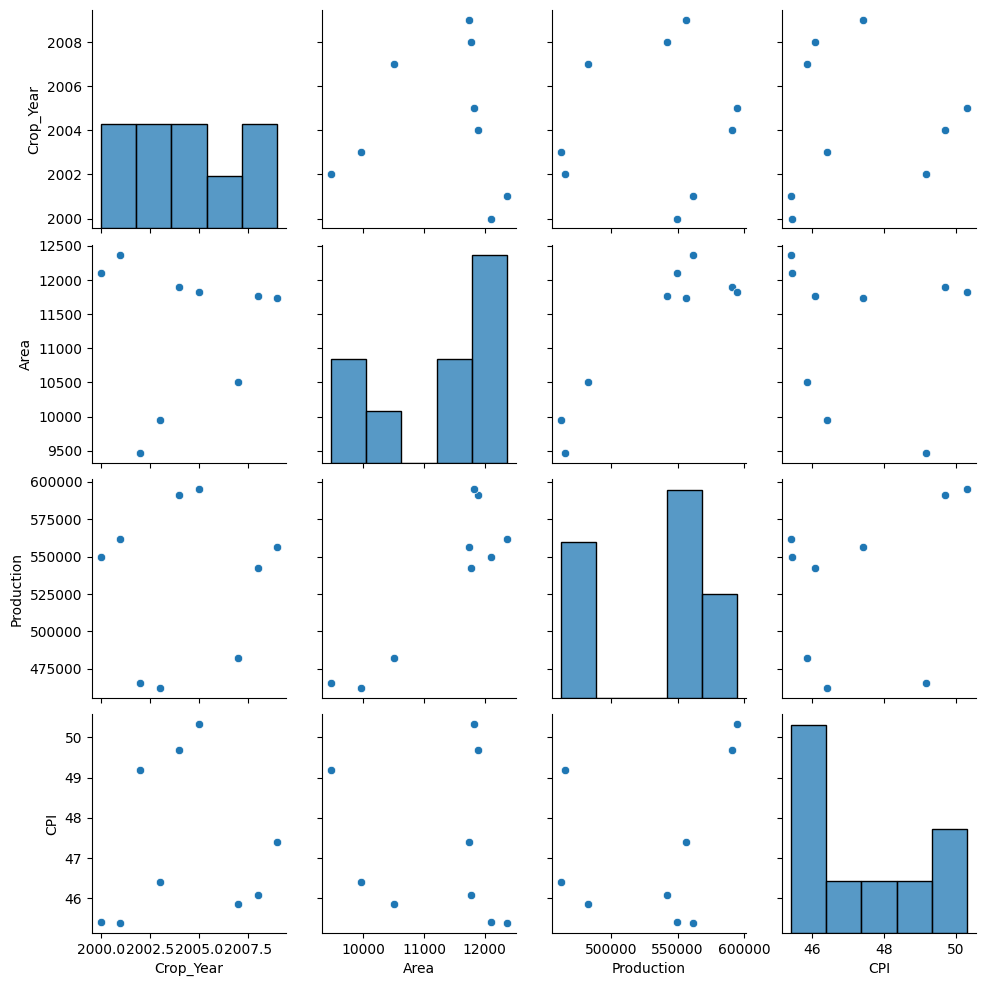

In [13]:
cols = ['Crop_Year', 'Area', 'Production', 'CPI']
sns.pairplot(data[cols], size = 2.5)
plt.show()

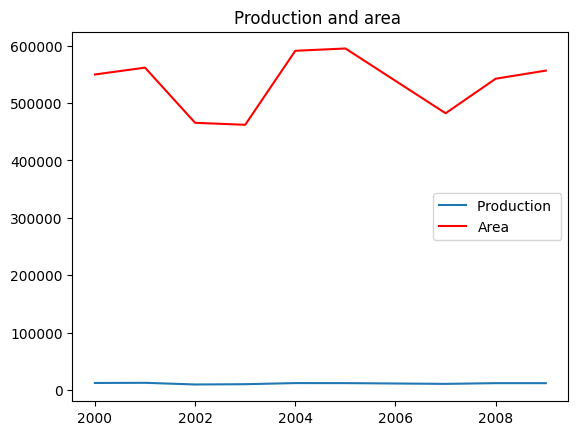

In [14]:
x_axis=data.Crop_Year
y_axis=data.Area

y1_axis=data.Production

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')

plt.title("Production and area ")
plt.legend(["Production ","Area"])
plt.show()

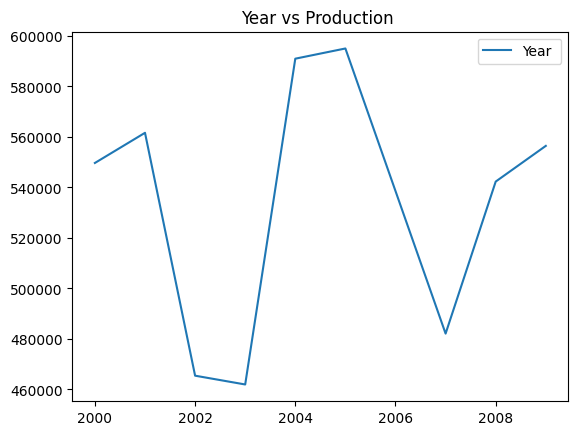

In [15]:
x_axis=data.Crop_Year
y1_axis=data.Production



plt.plot(x_axis,y1_axis)

plt.title("Year vs Production ")
plt.legend(["Year ","Production"])
plt.show()

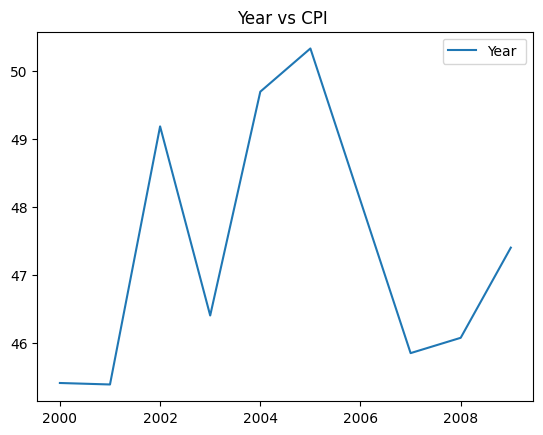

In [16]:
x_axis=data.Crop_Year
y1_axis=data.CPI



plt.plot(x_axis,y1_axis)

plt.title("Year vs CPI ")
plt.legend(["Year ","CPI"])
plt.show()

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [18]:
x=data.iloc[:,0:1].values
y=data.iloc[:,3].values
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2,random_state=123)
print(x_test)
print(y_test)
print(x_train)
print(y_train)
regressor=RandomForestRegressor(n_estimators=12,random_state=0,n_jobs=1,verbose=13)

regressor.fit(x_test,y_test)

[[2005]
 [2007]
 [2003]
 [2001]
 [2009]
 [2004]
 [2002]]
[50.32817651 45.85619088 46.40848183 45.39582669 47.40459874 49.69381378
 49.18451852]
[[2008]
 [2000]]
[46.08106655 45.41766068]
building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished


RandomForestRegressor(n_estimators=12, n_jobs=1, random_state=0, verbose=13)

In [19]:

y_pred=regressor.predict(x_test)
y_pred

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished


array([49.69477621, 47.55205717, 47.46115121, 45.79593894, 47.20826469,
       48.55626186, 47.69028485])

In [20]:
import numpy as np
corr_matrix = np.corrcoef(y_test, y_pred)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

0.7122528478179312


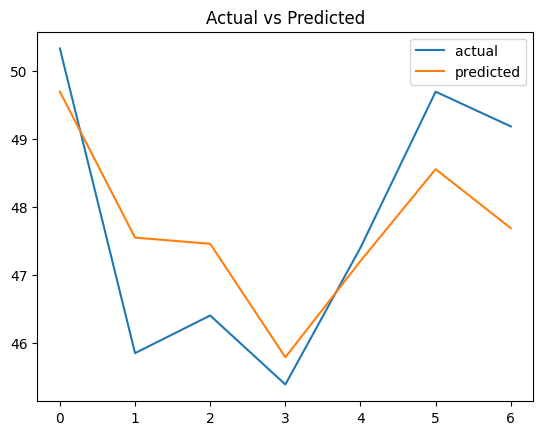

In [21]:
dm = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
y1_axis=dm.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
b=plt.show()
b

In [22]:
df1=df.groupby('Crop')[['Area','Production']].mean()
df2=df1.reset_index(level=0, inplace=False)
df2.head(9)

,Crop,Area,Production
0,Apple,2.250000,0.000000
1,Arcanut (Processed),7205.800000,9641.550000
2,Arecanut,3812.309880,13229.253355
3,Arhar/Tur,7626.225417,5261.020643
4,Ash Gourd,37.363636,0.000000
5,Atcanut (Raw),7205.800000,46362.500000
6,Bajra,26007.150175,24108.755531
7,Banana,1635.907893,46643.051274
8,Barley,2478.712643,5368.869514


In [23]:
df2['CPI']=df2['Production']/df2['Area']
df2.head(9)

,Crop,Area,Production,CPI
0,Apple,2.250000,0.000000,0.000000
1,Arcanut (Processed),7205.800000,9641.550000,1.338026
2,Arecanut,3812.309880,13229.253355,3.470141
3,Arhar/Tur,7626.225417,5261.020643,0.689859
4,Ash Gourd,37.363636,0.000000,0.000000
5,Atcanut (Raw),7205.800000,46362.500000,6.434053
6,Bajra,26007.150175,24108.755531,0.927005
7,Banana,1635.907893,46643.051274,28.512028
8,Barley,2478.712643,5368.869514,2.165991


In [24]:
import pandas as pd
data1=pd.DataFrame({"predictedvalue":y_pred})
data1

,predictedvalue
0,49.694776
1,47.552057
2,47.461151
3,45.795939
4,47.208265
5,48.556262
6,47.690285


In [25]:
df2['Predicted value'] = data1
df2.head(9)

,Crop,Area,Production,CPI,Predicted value
0,Apple,2.250000,0.000000,0.000000,49.694776
1,Arcanut (Processed),7205.800000,9641.550000,1.338026,47.552057
2,Arecanut,3812.309880,13229.253355,3.470141,47.461151
3,Arhar/Tur,7626.225417,5261.020643,0.689859,45.795939
4,Ash Gourd,37.363636,0.000000,0.000000,47.208265
5,Atcanut (Raw),7205.800000,46362.500000,6.434053,48.556262
6,Bajra,26007.150175,24108.755531,0.927005,47.690285
7,Banana,1635.907893,46643.051274,28.512028,NaN
8,Barley,2478.712643,5368.869514,2.165991,NaN


In [26]:
df2[df2['CPI']==df2['Predicted value']]
df2.Crop.head()

0                  Apple
1    Arcanut (Processed)
2               Arecanut
3              Arhar/Tur
4              Ash Gourd
Name: Crop, dtype: object

In [27]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.9443096929588292


In [28]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


R-squared (R2) score: 0.6553170117082417
